<a href="https://colab.research.google.com/github/ksknysn/Coursera/blob/main/TensorFlowDeveloper/C2_W2_Lab_1_cats_v_dogs_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source: https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C2/W2/ungraded_labs/C2_W2_Lab_1_cats_v_dogs_augmentation.ipynb

In [1]:
!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Downloading...
From: https://drive.google.com/uc?id=1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
To: /content/cats_and_dogs_filtered.zip
68.6MB [00:00, 147MB/s]


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 38s - loss: 0.6911 - accuracy: 0.5135 - val_loss: 0.6786 - val_accuracy: 0.6240
Epoch 2/100
100/100 - 10s - loss: 0.6628 - accuracy: 0.6100 - val_loss: 0.6424 - val_accuracy: 0.6550
Epoch 3/100
100/100 - 10s - loss: 0.6272 - accuracy: 0.6490 - val_loss: 0.6099 - val_accuracy: 0.6660
Epoch 4/100
100/100 - 10s - loss: 0.5773 - accuracy: 0.6880 - val_loss: 0.5780 - val_accuracy: 0.6920
Epoch 5/100
100/100 - 10s - loss: 0.5487 - accuracy: 0.7200 - val_loss: 0.5587 - val_accuracy: 0.7130
Epoch 6/100
100/100 - 10s - loss: 0.5204 - accuracy: 0.7400 - val_loss: 0.6379 - val_accuracy: 0.6690
Epoch 7/100
100/100 - 10s - loss: 0.4912 - accuracy: 0.7610 - val_loss: 0.5680 - val_accuracy: 0.7070
Epoch 8/100
100/100 - 10s - loss: 0.4685 - accuracy: 0.7715 - val_loss: 0.5981 - val_accuracy: 0.7060
Epoch 9/100
100/100 - 10s - loss: 0.4381 - accuracy: 0.8000 - val_loss: 0.5398 - val_accuracy: 0.736

augment the image

In [2]:
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 21s - loss: 0.6920 - accuracy: 0.5280 - val_loss: 0.6835 - val_accuracy: 0.5000
Epoch 2/100
100/100 - 20s - loss: 0.6835 - accuracy: 0.5635 - val_loss: 0.6974 - val_accuracy: 0.5160
Epoch 3/100
100/100 - 20s - loss: 0.6672 - accuracy: 0.6080 - val_loss: 0.6355 - val_accuracy: 0.6430
Epoch 4/100
100/100 - 20s - loss: 0.6601 - accuracy: 0.6115 - val_loss: 0.6237 - val_accuracy: 0.6630
Epoch 5/100
100/100 - 20s - loss: 0.6378 - accuracy: 0.6310 - val_loss: 0.5901 - val_accuracy: 0.6830
Epoch 6/100
100/100 - 20s - loss: 0.6325 - accuracy: 0.6450 - val_loss: 0.5703 - val_accuracy: 0.7200
Epoch 7/100
100/100 - 20s - loss: 0.6163 - accuracy: 0.6565 - val_loss: 0.5636 - val_accuracy: 0.7140
Epoch 8/100
100/100 - 20s - loss: 0.6013 - accuracy: 0.6615 - val_loss: 0.5738 - val_accuracy: 0.6920
Epoch 9/100
100/100 - 20s - loss: 0.5993 - accuracy: 0.6700 - val_loss: 0.5537 - val_accuracy: 0.709

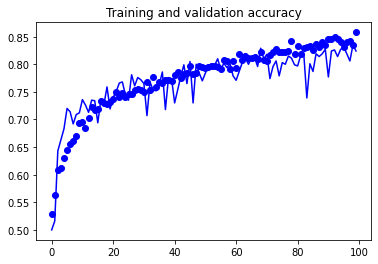

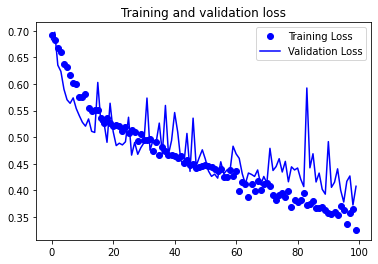

In [3]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Dropout

In [4]:
# !gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9

  
# import os
# import zipfile
# import tensorflow as tf
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
# zip_ref.extractall("tmp/")
# zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.5105 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 2/100
100/100 - 20s - loss: 0.6857 - accuracy: 0.5380 - val_loss: 0.6696 - val_accuracy: 0.5600
Epoch 3/100
100/100 - 20s - loss: 0.6759 - accuracy: 0.5780 - val_loss: 0.6533 - val_accuracy: 0.6000
Epoch 4/100
100/100 - 20s - loss: 0.6647 - accuracy: 0.5960 - val_loss: 0.6324 - val_accuracy: 0.6380
Epoch 5/100
100/100 - 20s - loss: 0.6522 - accuracy: 0.6195 - val_loss: 0.7673 - val_accuracy: 0.5260
Epoch 6/100
100/100 - 20s - loss: 0.6344 - accuracy: 0.6350 - val_loss: 0.8449 - val_accuracy: 0.5280
Epoch 7/100
100/100 - 19s - loss: 0.6250 - accuracy: 0.6485 - val_loss: 0.6149 - val_accuracy: 0.6450
Epoch 8/100
100/100 - 20s - loss: 0.6150 - accuracy: 0.6665 - val_loss: 0.5690 - val_accuracy: 0.6880
Epoch 9/100
100/100 - 19s - loss: 0.6057 - accuracy: 0.6770 - val_loss: 0.5833 - val_accuracy: 0.679

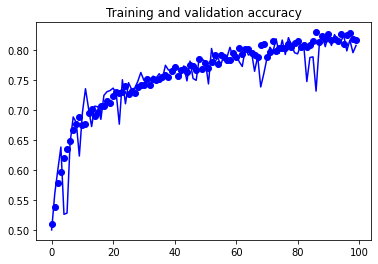

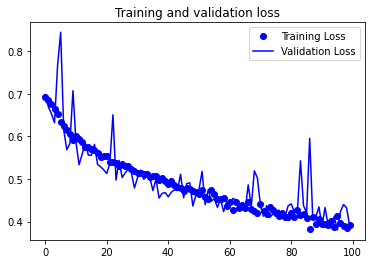

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()